In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mobile_recommendation_system_dataset.csv')

In [3]:
df

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...
...,...,...,...,...,...
2541,"REDMI Note 9 (Shadow Black, 64 GB)",4.3,11999,https://rukminim2.flixcart.com/image/312/312/k...,Storage64 GBRAM4 GBExpandable Storage512GB Sy...
2542,"OnePlus 9 5G (Astral Black, 128 GB)",3.9,30203,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM8 SystemAndroid 11Processor S...
2543,Motorola a50,4.1,1549,https://rukminim2.flixcart.com/image/312/312/k...,NaN
2544,"SAMSUNG Galaxy S22 Ultra 5G (Phantom Black, 25...",4.3,20463,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 12Processor ...


In [4]:
missind_values = df.isnull().sum()

In [5]:
missind_values

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64

In [6]:
shape = df.shape
shape

(2546, 5)

In [7]:
df_clean = df.dropna()

clean_shape = df_clean.shape

clean_missing_value = df_clean.isnull().sum()
clean_shape, clean_missing_value

((2534, 5),
 name       0
 ratings    0
 price      0
 imgURL     0
 corpus     0
 dtype: int64)

In [8]:
a = df_clean['corpus'][0]

In [9]:
import re

In [10]:
def extract_storage(corpus):
    match = re.search(r'Storage(\d+)',corpus)
    if match:
        return int(match.group(1))
    return None


In [11]:
df_clean['storage'] = df_clean['corpus'].apply(extract_storage)


df_clean.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\2600465621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['storage'] = df_clean['corpus'].apply(extract_storage)


,name,ratings,price,imgURL,corpus,storage
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0


In [12]:
def extract_ram(corpus):
    match = re.search(r'RAM(\d+)',corpus)
    if match:
        return int(match.group(1))
    return None
    

In [13]:
# my exerice
a = df['corpus'][0]
result = re.search(r'RAM(\d+)',a)
print(result.span())

(13, 17)


In [14]:
# my exerice
a

'Storage128 GBRAM6  SystemAndroid 12Processor TypeMediatek Dimensity 1080Processor Speed2.6 50MP 8MP 2MP 50MP 16MP 5G Capacity5000 Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+ AMOLED DisplayGPUARM Mali-G68 MC4Display TypeFull HD+ AMOLED DisplayOther Display FeaturesRefresh Rate: 120 Hz, Contrast: 5,000,000:1, 1920Hz PWM Dimming, Brightness Level: 16000:1, Peak Brightness: 900 nits'

In [15]:
# my exerice
re.search('RAM',a)

<re.Match object; span=(13, 16), match='RAM'>

In [16]:
df_clean['RAM'] = df_clean['corpus'].apply(extract_ram)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\621024870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['RAM'] = df_clean['corpus'].apply(extract_ram)


In [17]:
df_clean.head()

,name,ratings,price,imgURL,corpus,storage,RAM
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN


In [21]:
def extract_system(corpus):
    match = re.search(r'System(.*?)Processor',corpus)
    if match:
        return match.group(1).strip()
    return None

In [22]:
df_clean['system'] = df_clean['corpus'].apply(extract_system)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\3896707285.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['system'] = df_clean['corpus'].apply(extract_system)


In [23]:
df_clean.head()

,name,ratings,price,imgURL,corpus,storage,RAM,system
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS 15


In [27]:
def extract_processor(corpus):
    match = re.search(r'Processor (.*?) ',corpus)
    if match:
        return match.group(1).strip()
    return None

In [28]:
df_clean['Processor'] = df_clean['corpus'].apply(extract_processor)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\757101342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Processor'] = df_clean['corpus'].apply(extract_processor)


In [29]:
df_clean.head()

,name,ratings,price,imgURL,corpus,storage,RAM,system,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,TypeMediatek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,TypeMediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Speed2.4
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,TypeQualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS 15,TypeA15


In [30]:
unique_system = df_clean['system'].unique()
unique_processor = df_clean['Processor'].unique()

unique_system,unique_processor

(array(['Android 12', 'Android Pie 9.0', 'Android 11', 'Android Q 11',
        'iOS 15', 'iOS 9', 'Android 13', 'Android Pie 9',
        'Android Nougat 7', 'Android 10', 'iOS 16', None,
        'Android Q Android Q 12.5', 'Android Oreo 8.1',
        'Android Marshmallow 6.0.1', 'Android Oreo 8.1.0',
        'Android 13 (Go Edition)', 'Android Android 12', 'Android Q 10',
        'iOS 14.2', 'Android Pie Android v9.0 (Pie)', 'Android Andriod 11',
        'Android Android 10',
        'Android HiOS 8.6 based on Android 12-Go Edition',
        'Android Nougat 7.1', 'iOS 14', 'Android Android 13', 'iOS 12',
        'Android 12 Go', 'iOS 7', 'Android Nougat 7.1.2',
        'Android Oreo V11', 'Android ANdroid 13 OxygenOS',
        'Android Android 13.0', 'Android Android v12.0',
        'Android Android 11', 'Android Pie 10', 'Android Oreo 8.0', 'Q 10',
        'Android Q ANDROID 10', 'Android Q 12', 'iOS 13',
        'Android Android 11 Go', 'Android 10 (Go Edition)',
        'Android Oxy

In [33]:
def cleaning_system(system):
    if pd.isnull(system):
        return None
    if 'andriod' in system.lower():
        return 'Andriod'
    if 'ios' in system.lower():
        return 'iOS'
    if 'tizen' in system.lower():
        return 'Tizen'
    return system

df_clean['system'] = df_clean['system'].apply(cleaning_system)

unique_system_clean = df_clean['system'].unique()
print(unique_system_clean)

['Android 12' 'Android Pie 9.0' 'Android 11' 'Android Q 11' 'iOS'
 'Android 13' 'Android Pie 9' 'Android Nougat 7' 'Android 10' None
 'Android Q Android Q 12.5' 'Android Oreo 8.1' 'Android Marshmallow 6.0.1'
 'Android Oreo 8.1.0' 'Android 13 (Go Edition)' 'Android Android 12'
 'Android Q 10' 'Android Pie Android v9.0 (Pie)' 'Andriod'
 'Android Android 10' 'Android Nougat 7.1' 'Android Android 13'
 'Android 12 Go' 'Android Nougat 7.1.2' 'Android Oreo V11'
 'Android ANdroid 13 OxygenOS' 'Android Android 13.0'
 'Android Android v12.0' 'Android Android 11' 'Android Pie 10'
 'Android Oreo 8.0' 'Q 10' 'Android Q ANDROID 10' 'Android Q 12'
 'Android Android 11 Go' 'Android 10 (Go Edition)'
 'Android Oxygen OxygenOS based on Android 13' 'Series 30 Feature phone'
 'Android Lollipop 5.1' 'Android Q 111' 'Android Q Android 11'
 'Android Android 11 (Go edition)' 'Android Android 12.0'
 'Android Lollipop 5.0.2' 'Android MIUI 13, Android 12.0'
 'Android Lollipop Color OS 3.0 based on Android 5.1'
 '

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\653872679.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['system'] = df_clean['system'].apply(cleaning_system)


In [34]:
def clean_processor(processor):
    """Clean the processor values."""
    if pd.isnull(processor):
        return None
    if 'mediatek' in processor.lower():
        return 'MediaTek'
    if 'qualcomm' in processor.lower():
        return 'Qualcomm'
    if 'apple' in processor.lower():
        return 'Apple'
    return 'Other'

# Apply the function to the 'Processor' column
df_clean['Processor'] = df_clean['Processor'].apply(clean_processor)

# Check the unique values for 'Processor'
unique_processors_clean = df_clean['Processor'].unique()

unique_processors_clean

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\1699683873.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Processor'] = df_clean['Processor'].apply(clean_processor)


array(['MediaTek', 'Other', 'Qualcomm', None, 'Apple'], dtype=object)

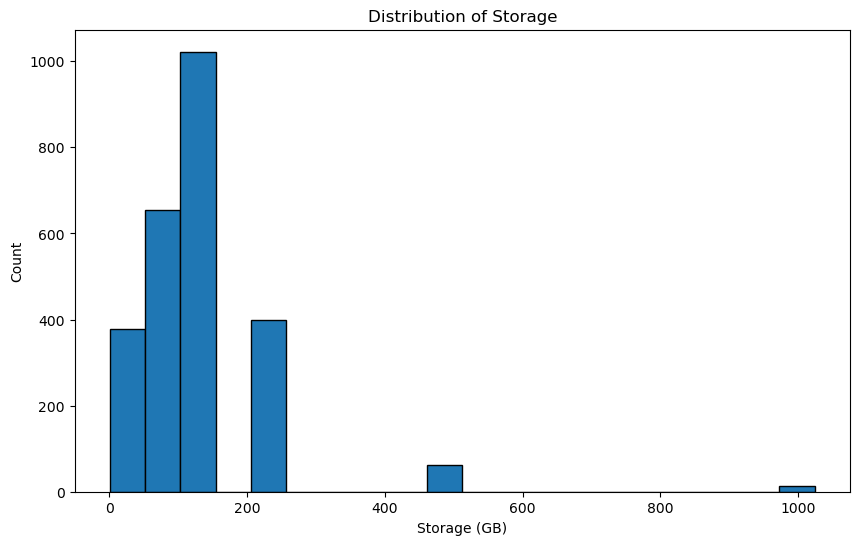

In [36]:
import matplotlib.pyplot as plt

# Plot a histogram of the 'Storage' feature
plt.figure(figsize=(10, 6))
plt.hist(df_clean['storage'], bins=20, edgecolor='black')
plt.title('Distribution of Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Count')
plt.show()


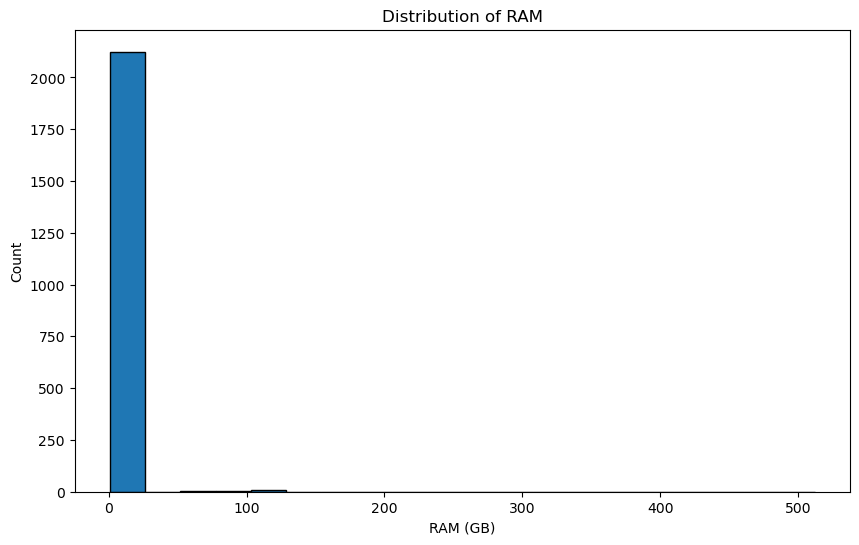

In [37]:
# Plot a histogram of the 'RAM' feature
plt.figure(figsize=(10, 6))
plt.hist(df_clean['RAM'].dropna(), bins=20, edgecolor='black')  # Drop NaN values for the plot
plt.title('Distribution of RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Count')
plt.show()


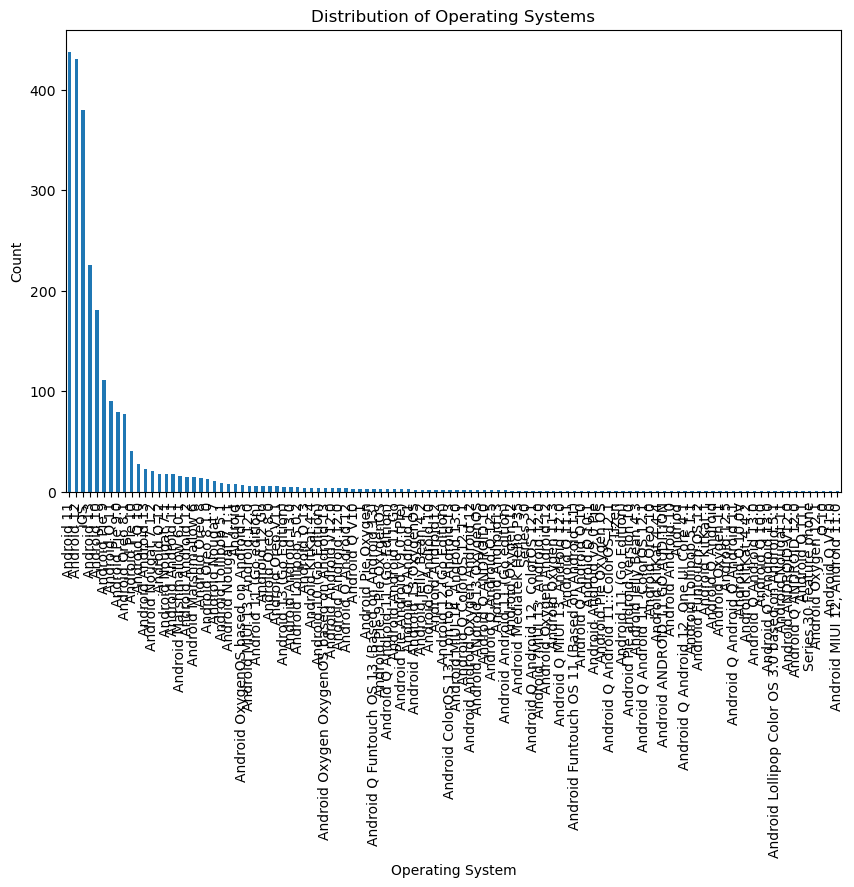

In [39]:
# Plot a bar chart of the 'System' feature
plt.figure(figsize=(10, 6))
df_clean['system'].value_counts().plot(kind='bar')
plt.title('Distribution of Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()

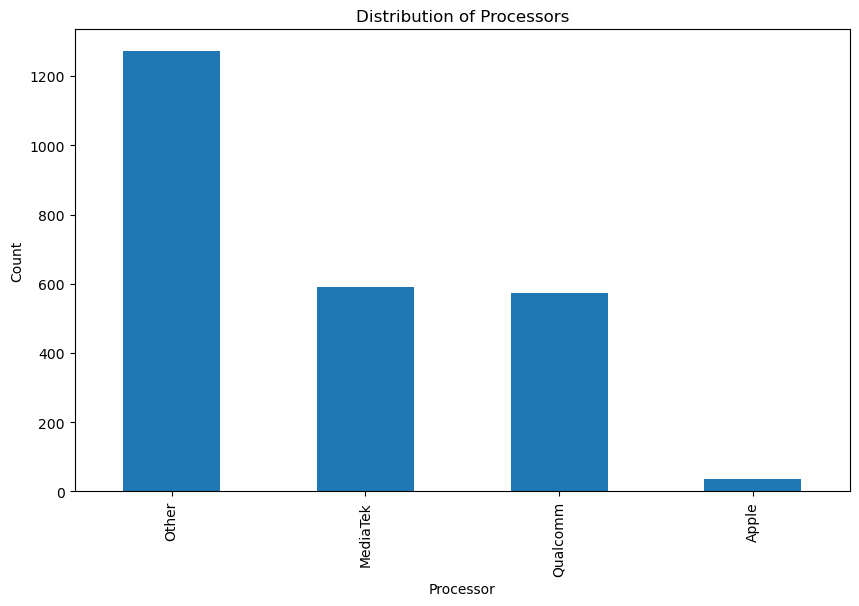

In [40]:
# Plot a bar chart of the 'Processor' feature
plt.figure(figsize=(10, 6))
df_clean['Processor'].value_counts().plot(kind='bar')
plt.title('Distribution of Processors')
plt.xlabel('Processor')
plt.ylabel('Count')
plt.show()

In [42]:
def clean_price(price):
    cleaned_price = re.sub(r'\D', '',price)
    try:
        return int(cleaned_price)
    except ValueError:
        return None
df_clean['price'] = df_clean['price'].apply(clean_price)


        

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\1522691492.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].apply(clean_price)


In [43]:
df_clean.head()

,name,ratings,price,imgURL,corpus,storage,RAM,system,Processor
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,MediaTek
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,MediaTek
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Other
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,Qualcomm
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other


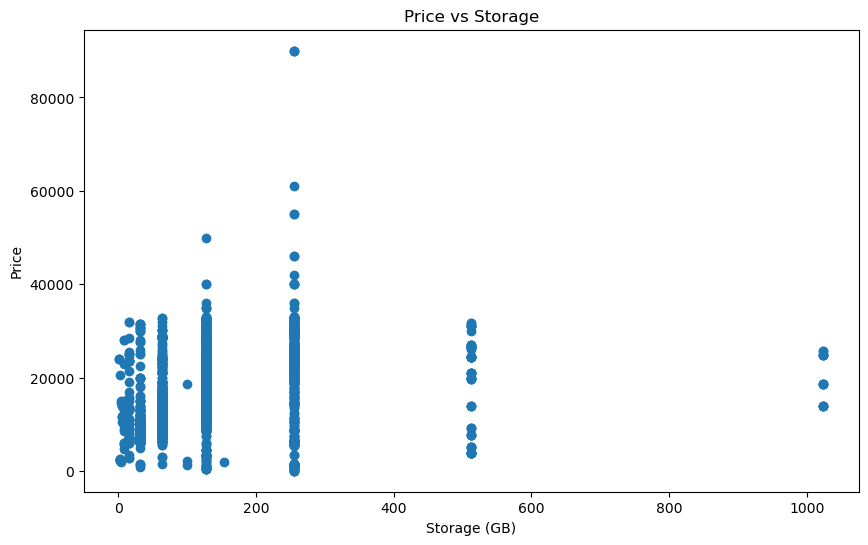

0.2708852261801912

In [45]:
    # Plot a scatter plot of 'price' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['storage'], df_clean['price'])
plt.title('Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'Storage'
correlation = df_clean['price'].corr(df_clean['storage'])

correlation

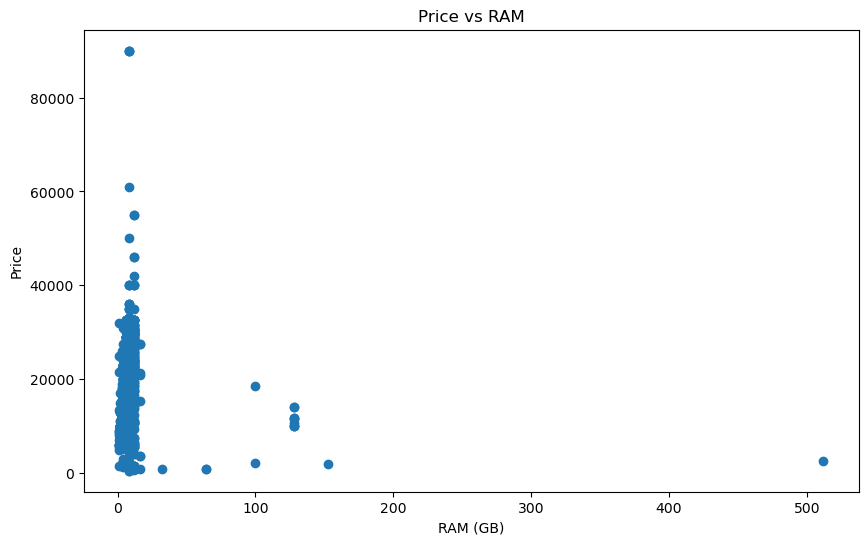

0.02916717859102835

In [46]:
# Plot a scatter plot of 'price' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RAM'], df_clean['price'])
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price')
plt.show()

# Calculate the correlation coefficient between 'price' and 'RAM'
correlation = df_clean['price'].corr(df_clean['RAM'])

correlation

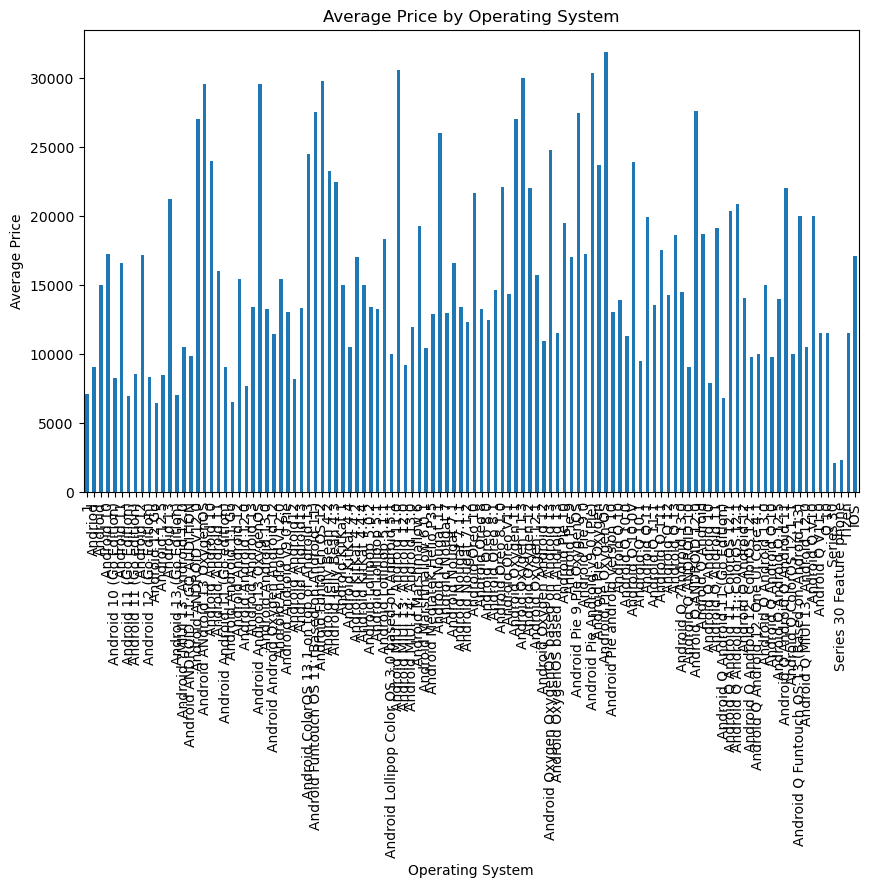

In [47]:
# Calculate the average price for each system
avg_price_system = df_clean.groupby('system')['price'].mean()

# Plot a bar chart of the average price for each system
plt.figure(figsize=(10, 6))
avg_price_system.plot(kind='bar')
plt.title('Average Price by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Price')
plt.show()


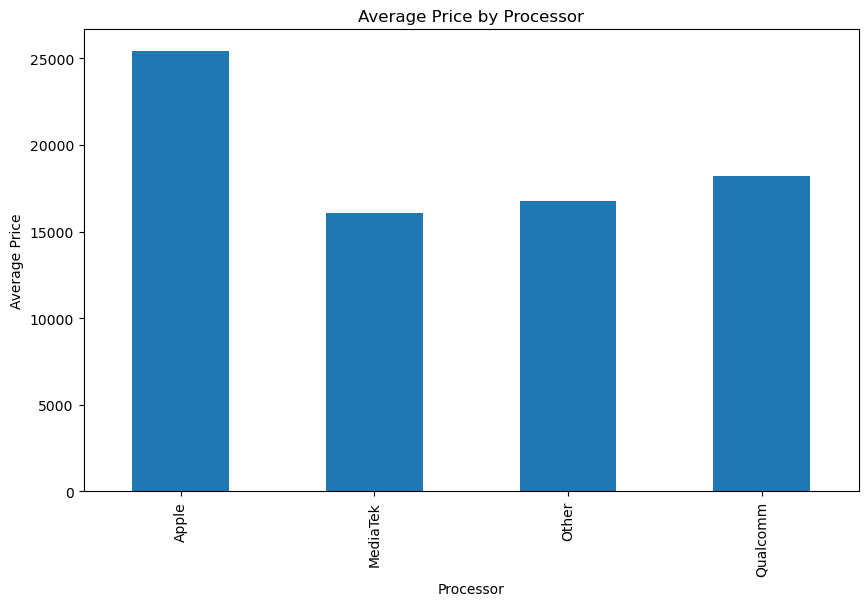

In [48]:
# Calculate the average price for each processor
avg_price_processor = df_clean.groupby('Processor')['price'].mean()

# Plot a bar chart of the average price for each processor
plt.figure(figsize=(10, 6))
avg_price_processor.plot(kind='bar')
plt.title('Average Price by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Price')
plt.show()

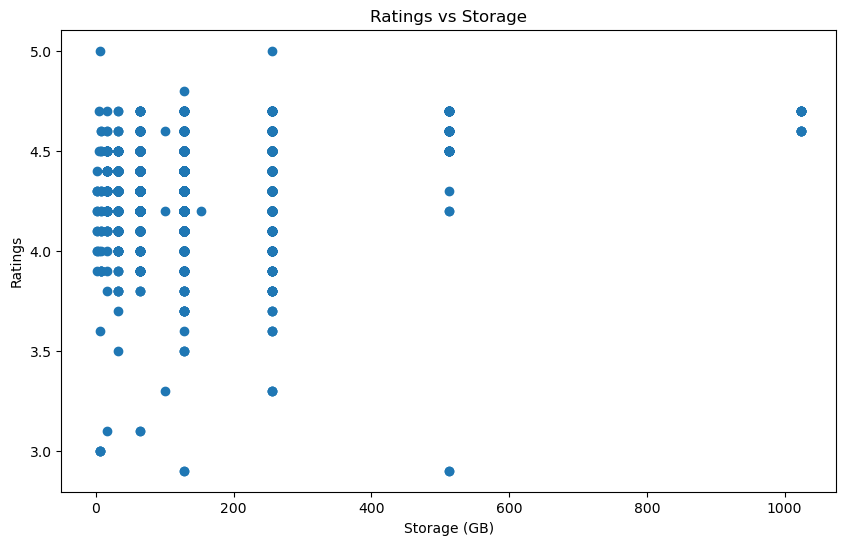

0.20690422834488445

In [50]:
# Plot a scatter plot of 'ratings' vs 'Storage'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['storage'], df_clean['ratings'])
plt.title('Ratings vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'Storage'
correlation = df_clean['ratings'].corr(df_clean['storage'])

correlation


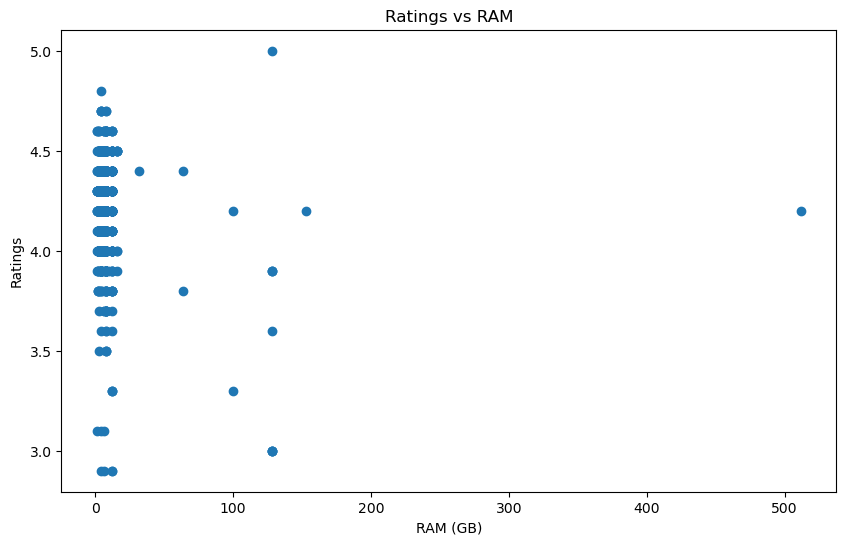

-0.1569162647197964

In [51]:
# Plot a scatter plot of 'ratings' vs 'RAM'
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['RAM'], df_clean['ratings'])
plt.title('Ratings vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Ratings')
plt.show()

# Calculate the correlation coefficient between 'ratings' and 'RAM'
correlation = df_clean['ratings'].corr(df_clean['RAM'])

correlation

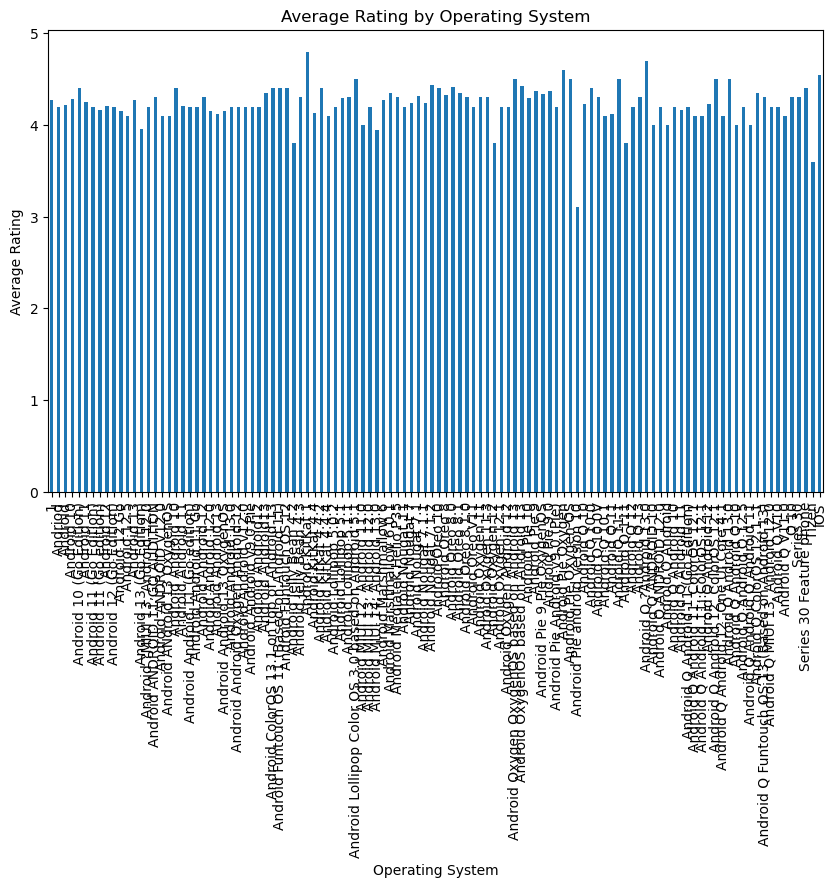

In [53]:
# Calculate the average rating for each system
avg_rating_system = df_clean.groupby('system')['ratings'].mean()

# Plot a bar chart of the average rating for each system
plt.figure(figsize=(10, 6))
avg_rating_system.plot(kind='bar')
plt.title('Average Rating by Operating System')
plt.xlabel('Operating System')
plt.ylabel('Average Rating')
plt.show()

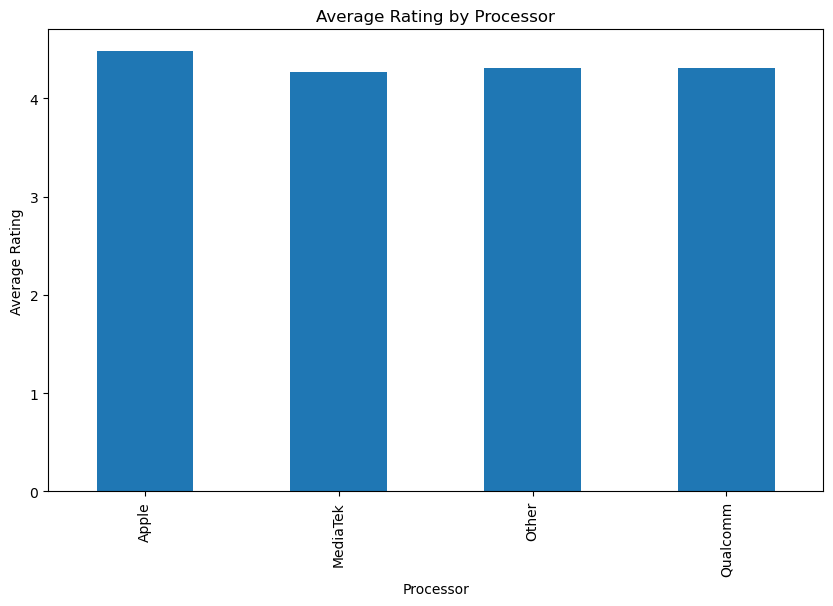

In [54]:
# Calculate the average rating for each processor
avg_rating_processor = df_clean.groupby('Processor')['ratings'].mean()

# Plot a bar chart of the average rating for each processor
plt.figure(figsize=(10, 6))
avg_rating_processor.plot(kind='bar')
plt.title('Average Rating by Processor')
plt.xlabel('Processor')
plt.ylabel('Average Rating')
plt.show()

In [55]:
def extract_brand(name):
    """Extract the brand from the name."""
    return name.split()[0]

# Apply the function to the 'name' column
df_clean['Brand'] = df_clean['name'].apply(extract_brand)

# Check the first few rows of the DataFrame
df_clean.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1740\671607510.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Brand'] = df_clean['name'].apply(extract_brand)


,name,ratings,price,imgURL,corpus,storage,RAM,system,Processor,Brand
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...,128.0,6.0,Android 12,MediaTek,REDMI
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...,128.0,6.0,Android Pie 9.0,MediaTek,OPPO
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...,64.0,4.0,Android 11,Other,REDMI
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...,256.0,12.0,Android Q 11,Qualcomm,OnePlus
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...,128.0,NaN,iOS,Other,APPLE


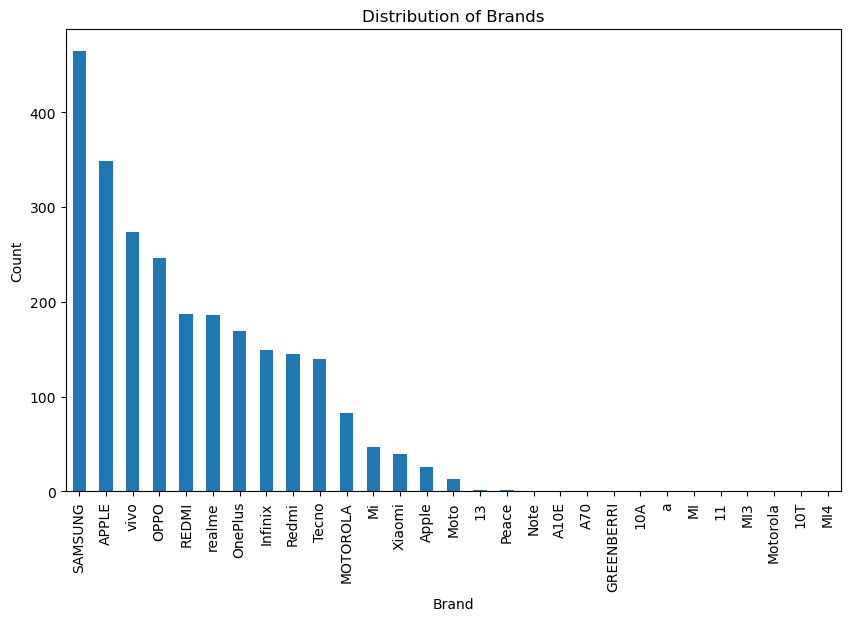

In [56]:
# Plot a bar chart of the brands
plt.figure(figsize=(10, 6))
df_clean['Brand'].value_counts().plot(kind='bar')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

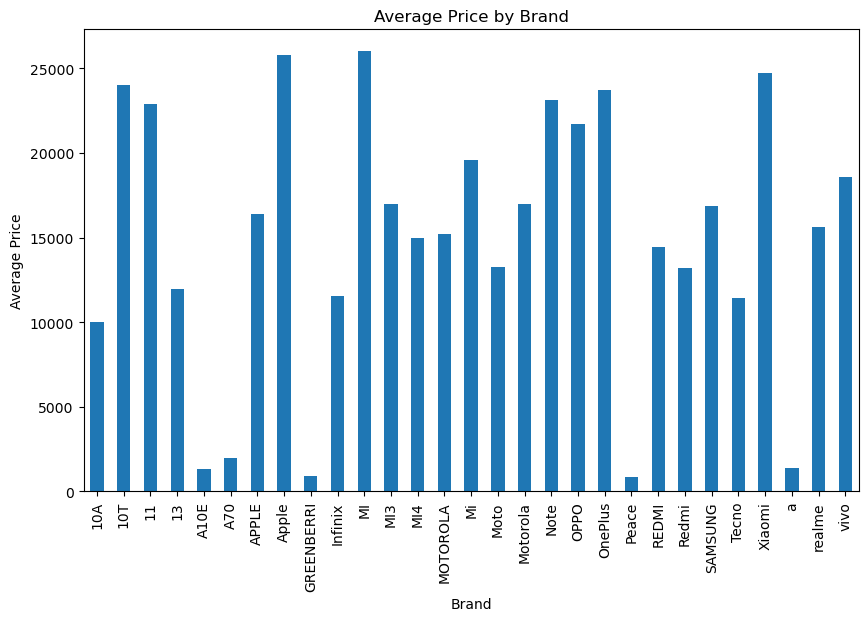

In [57]:
# Calculate the average price for each brand
avg_price_brand = df_clean.groupby('Brand')['price'].mean()

# Plot a bar chart of the average price for each brand
plt.figure(figsize=(10, 6))
avg_price_brand.plot(kind='bar')
plt.title('Average Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Price')
plt.show()

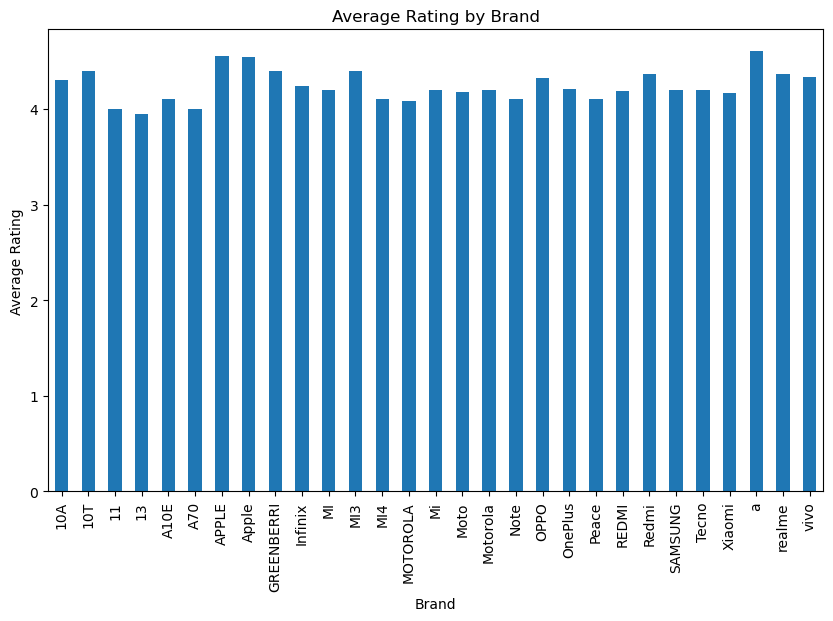

In [58]:
# Calculate the average rating for each brand
avg_rating_brand = df_clean.groupby('Brand')['ratings'].mean()

# Plot a bar chart of the average rating for each brand
plt.figure(figsize=(10, 6))
avg_rating_brand.plot(kind='bar')
plt.title('Average Rating by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()

In [64]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on the user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['system'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]
    
    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=70000, max_price=100000)


,name,ratings,price,imgURL,corpus,storage,RAM,system,Processor,Brand


In [65]:
# Test the function with different preferences
recommend_devices(preferred_brand='Samsung', preferred_system='Android', min_price=20000, max_price=30000)

,name,ratings,price,imgURL,corpus,storage,RAM,system,Processor,Brand


In [66]:
def recommend_devices(preferred_brand, preferred_system, min_price, max_price):
    """Recommend devices based on user preferences."""
    # Filter the DataFrame based on all user's preferences
    df_filtered = df_clean[
        (df_clean['Brand'] == preferred_brand) &
        (df_clean['system'] == preferred_system) &
        (df_clean['price'] >= min_price) &
        (df_clean['price'] <= max_price)
    ]
    
    # If no devices match all preferences, filter based on brand and price range
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['Brand'] == preferred_brand) &
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]
    
    # If still no devices match, filter based on price range only
    if df_filtered.empty:
        df_filtered = df_clean[
            (df_clean['price'] >= min_price) &
            (df_clean['price'] <= max_price)
        ]
    
    # Sort the filtered DataFrame by ratings, and select the top 5 devices
    recommendations = df_filtered.sort_values(by='ratings', ascending=False).head(5)
    
    return recommendations

# Test the function with some example preferences
recommend_devices(preferred_brand='Apple', preferred_system='iOS', min_price=50000, max_price=80000)


,name,ratings,price,imgURL,corpus,storage,RAM,system,Processor,Brand
297,"OPPO Reno10 Pro+ 5G (Silvery Grey, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android 13,Other,OPPO
1633,"OPPO Reno10 Pro+ 5G (Glossy Purple, 256 GB)",4.6,54999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid 13Processor ...,256.0,12.0,Android 13,Other,OPPO
1128,"OPPO Find X (Glacier Blue, 256 GB)",4.4,60990,https://rukminim2.flixcart.com/image/312/312/j...,Storage256 GBRAM8 SystemAndroid Oreo 8.1.0Pro...,256.0,8.0,Android Oreo 8.1.0,Other,OPPO
